# Volcanic Forcings and Feedback
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geoscience, Princeton University

In [1]:
from lib.util import year_shift
import xlearn

%matplotlib notebook

In [2]:
nino_ens = [1, 3, 4, 7, 9, 12, 17, 22, 26, 29]
nina_ens = [2, 5, 6, 8, 10, 11, 16, 23, 27, 30]
neut_ens = [13, 14, 15, 18, 19, 20, 21, 24, 25, 28]

In [2]:
if 'das' in globals() or 'das' in locals():
    pass
else:
    das = dict()

In [7]:
# data
dataname = 'precip'
scale = 24*3600
volcs = ['StMaria', 'Agung', 'Pinatubo']
years = [1902, 1963, 1991]
# months = [10, 3, 6]
# n_years = 2

# volc
ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
         for volc in volcs]
for volc, ifile, yyyy in zip(volcs, ifiles, years):
    key = f'{dataname}_{volc}'
    print(key)
    da = xr.open_dataarray(ifile) * scale
    das[key] = da

# ctl
ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
for volc, yyyy in zip(volcs, years):
    key = f'{dataname}_{volc}_ctl'
    print(key)
    da = xr.open_dataarray(ifile) * scale
    da = year_shift(da, n=yyyy-1, to_datetime=True)
    das[key] = da

precip_StMaria
precip_Agung
precip_Pinatubo
precip_StMaria_ctl


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


precip_Agung_ctl
precip_Pinatubo_ctl


In [6]:
das['precip_Agung']

<xarray.DataArray 'precip' (en: 30, time: 60, lat: 360, lon: 576)>
[373248000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 4.688 ...
  * time     (time) datetime64[ns] 1963-01-16T12:00:00 1963-02-15 ...
  * en       (en) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

## fig

<IPython.core.display.Javascript object>


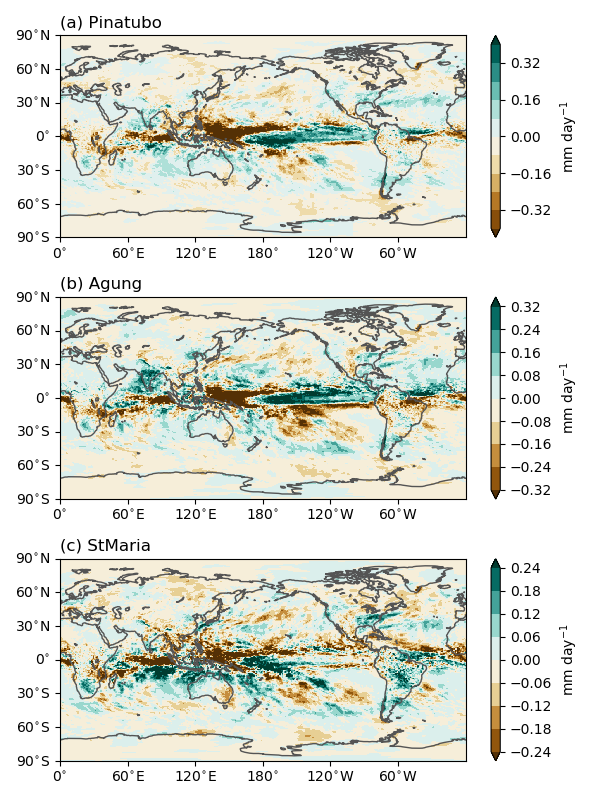

In [12]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharey=True)
dataname = 'precip'
units = 'mm day$^{-1}$'
levels = 10 #np.arange(-3, 3.1, .5)

ax = axes[0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
(da.mean('time').mean('en')
    .rename(units).plot(robust=True, levels=levels, center=0, cmap='BrBG', ax=ax)
)
mapplot(ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(a) {volc}', loc='left')

ax = axes[1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
(da.mean('time').mean('en')
    .rename(units).plot(robust=True, levels=levels, center=0, cmap='BrBG', ax=ax)
)
mapplot(ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(b) {volc}', loc='left')

ax = axes[2]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{dataname}_{volc}', f'{dataname}_{volc}_ctl'
da = das[keyv] - das[keyc]
(da.mean('time').mean('en')
    .rename(units).plot(robust=True, levels=levels, center=0, cmap='BrBG', ax=ax)
)
mapplot(ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(c) {volc}', loc='left')


plt.tight_layout()

figname = f'figs/fig_shade_{dataname}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


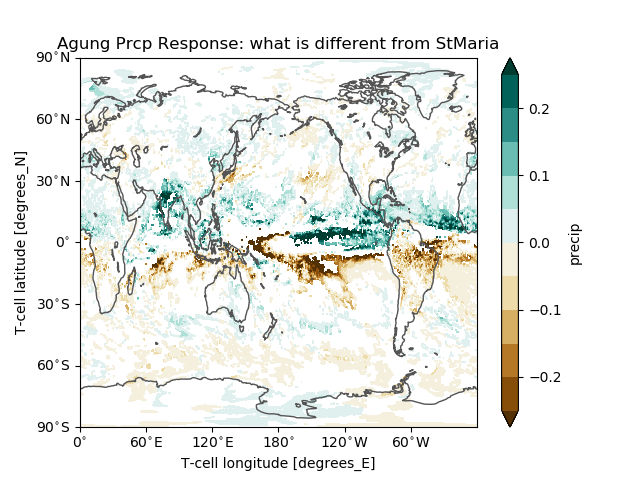

Text(0.5,1,'Agung Prcp Response: what is different from StMaria')

In [33]:
da_Agung = ( das['precip_Agung'] - das['precip_Agung_ctl'] ).mean('time').mean('en')
da_StMaria = ( das['precip_StMaria'] - das['precip_StMaria_ctl'] ).mean('time').mean('en')
da_Agung.where(da_Agung * da_StMaria < 0).plot(robust=True, levels=10, cmap='BrBG')
mapplot()
plt.title('Agung Prcp Response: what is different from StMaria')

<IPython.core.display.Javascript object>


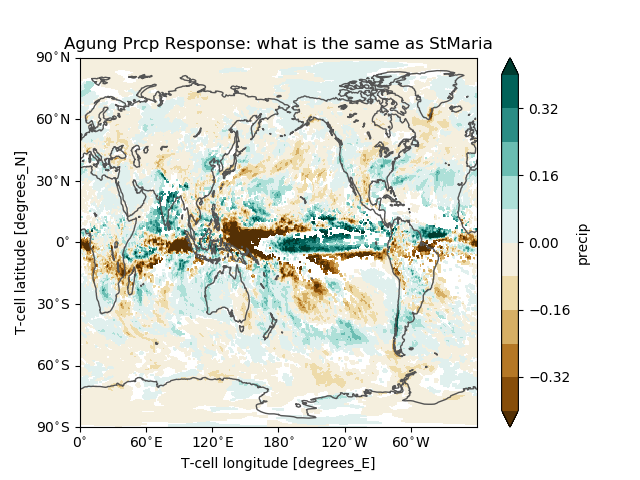

Text(0.5,1,'Agung Prcp Response: what is the same as StMaria')

In [31]:
da_Agung = ( das['precip_Agung'] - das['precip_Agung_ctl'] ).mean('time').mean('en')
da_StMaria = ( das['precip_StMaria'] - das['precip_StMaria_ctl'] ).mean('time').mean('en')
da_Agung.where(da_Agung * da_StMaria > 0).plot(robust=True, levels=10, cmap='BrBG')
mapplot()
plt.title('Agung Prcp Response: what is the same as StMaria')

<IPython.core.display.Javascript object>


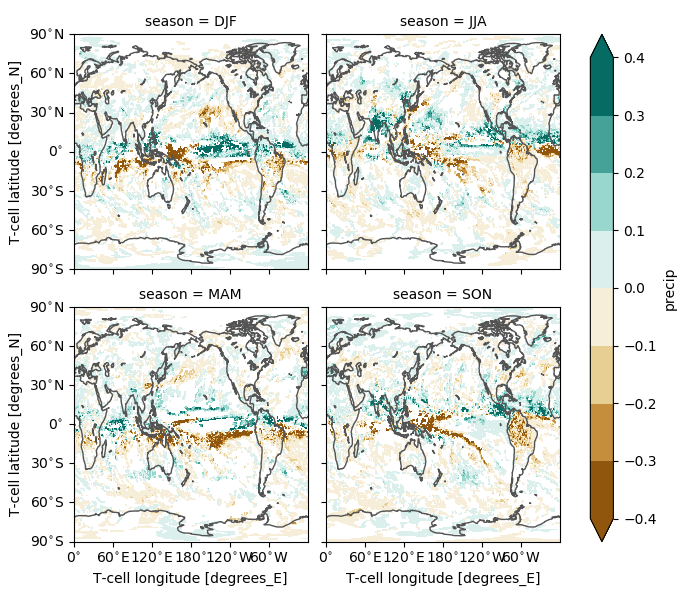

In [28]:
da_Agung = ( das['precip_Agung'] - das['precip_Agung_ctl'] ).groupby('time.season').mean('time').mean('en')
da_StMaria = ( das['precip_StMaria'] - das['precip_StMaria_ctl'] ).groupby('time.season').mean('time').mean('en')
f = da_Agung.where(da_Agung * da_StMaria < 0).plot(col='season', col_wrap=2, robust=True, levels=10, cmap='BrBG')
for ax in f.axes.flat:
    mapplot(ax=ax)